# **My First ML Project**

# **Load data**

In [1]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
dtype_dict = {
    'Requestid': int,
    'StatusCode': int,
    'ip': str,  # Read IP initially as a string
    'url': str,
    'type': str,
    'timestamp': str,
    'tableid': int,
    'fromcache': bool,
    'method': str,
    'target': str  
}

In [3]:
df = pd.read_csv(r'C:\Users\acer\Desktop\CYBER HYGIENE TOOL V9 Superuser\KavachLocalAI\urls.csv')
df

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method,target
0,1,404,192.168.1.1,https://example.com/page-not-found,html,1702391637000,1419931203,False,GET,good
1,2,200,192.168.1.2,https://example.com/home,html,1702391638000,1419931203,True,GET,good
2,3,302,192.168.1.3,https://example.com/redirected,html,1702391639000,1419931203,False,GET,good
3,4,200,192.168.1.4,https://example.com/image.jpg,image,1702391640000,1419931204,True,GET,good
4,5,200,192.168.1.5,https://example.com/style.css,css,1702391641000,1419931204,True,GET,good
...,...,...,...,...,...,...,...,...,...,...
110,5,200,192.168.1.5,https://example.com/style.css,css,1702391641000,1419931204,True,GET,good
111,6,500,192.168.1.6,https://example.com/server-error,html,1702391642000,1419931204,False,GET,malicious
112,7,200,192.168.1.7,https://example.com/success,html,1702391643000,1419931205,True,POST,good
113,8,403,192.168.1.8,https://example.com/forbidden,html,1702391644000,1419931205,False,GET,malicious


In [4]:
label_encoder = LabelEncoder()

print(df)


     Requestid  StatusCode           ip                                 url  \
0            1         404  192.168.1.1  https://example.com/page-not-found   
1            2         200  192.168.1.2            https://example.com/home   
2            3         302  192.168.1.3      https://example.com/redirected   
3            4         200  192.168.1.4       https://example.com/image.jpg   
4            5         200  192.168.1.5       https://example.com/style.css   
..         ...         ...          ...                                 ...   
110          5         200  192.168.1.5       https://example.com/style.css   
111          6         500  192.168.1.6    https://example.com/server-error   
112          7         200  192.168.1.7         https://example.com/success   
113          8         403  192.168.1.8       https://example.com/forbidden   
114          9         200  192.168.1.9       https://example.com/data.json   

      type      timestamp     tableid  fromcache me

# **Data preparation**

## Data separation as X and y

In [5]:
y = df['target']
y

0           good
1           good
2           good
3           good
4           good
         ...    
110         good
111    malicious
112         good
113    malicious
114         good
Name: target, Length: 115, dtype: object

In [6]:
X = df.drop('target', axis=1)
X

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method
0,1,404,192.168.1.1,https://example.com/page-not-found,html,1702391637000,1419931203,False,GET
1,2,200,192.168.1.2,https://example.com/home,html,1702391638000,1419931203,True,GET
2,3,302,192.168.1.3,https://example.com/redirected,html,1702391639000,1419931203,False,GET
3,4,200,192.168.1.4,https://example.com/image.jpg,image,1702391640000,1419931204,True,GET
4,5,200,192.168.1.5,https://example.com/style.css,css,1702391641000,1419931204,True,GET
...,...,...,...,...,...,...,...,...,...
110,5,200,192.168.1.5,https://example.com/style.css,css,1702391641000,1419931204,True,GET
111,6,500,192.168.1.6,https://example.com/server-error,html,1702391642000,1419931204,False,GET
112,7,200,192.168.1.7,https://example.com/success,html,1702391643000,1419931205,True,POST
113,8,403,192.168.1.8,https://example.com/forbidden,html,1702391644000,1419931205,False,GET


## Data splitting

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [8]:
X_train

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method
22,23,200,192.168.1.23,https://example.com/faq,html,1702391659000,1419931210,True,GET
62,42,200,192.168.1.42,https://example.com/error,html,1702391678000,1419931216,True,GET
81,43,200,192.168.1.43,https://example.com/warning,html,1702391679000,1419931217,True,GET
5,6,500,192.168.1.6,https://example.com/server-error,html,1702391642000,1419931204,False,GET
102,7,200,192.168.1.7,https://example.com/success,html,1702391643000,1419931205,True,POST
...,...,...,...,...,...,...,...,...,...
87,43,200,192.168.1.43,https://example.com/warning,html,1702391679000,1419931217,True,GET
103,8,403,192.168.1.8,https://example.com/forbidden,html,1702391644000,1419931205,False,GET
67,43,200,192.168.1.43,https://example.com/warning,html,1702391679000,1419931217,True,GET
24,50,200,192.168.1.50,https://example.com/download,html,1702391686000,1419931219,True,GET


In [9]:
X_test

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method
88,49,200,192.168.1.49,https://example.com/receipt,html,1702391685000,1419931219,True,GET
80,42,200,192.168.1.42,https://example.com/error,html,1702391678000,1419931216,True,GET
50,42,200,192.168.1.42,https://example.com/error,html,1702391678000,1419931216,True,GET
28,43,200,192.168.1.43,https://example.com/warning,html,1702391679000,1419931217,True,GET
95,50,200,192.168.1.50,https://example.com/download,html,1702391686000,1419931219,True,GET
74,42,200,192.168.1.42,https://example.com/error,html,1702391678000,1419931216,True,GET
26,43,200,192.168.1.43,https://example.com/warning,html,1702391679000,1419931217,True,GET
32,35,200,192.168.1.35,https://example.com/cart,html,1702391671000,1419931214,True,GET
33,36,200,192.168.1.36,https://example.com/checkout,html,1702391672000,1419931214,True,GET
25,42,200,192.168.1.42,https://example.com/error,html,1702391678000,1419931216,True,GET


In [10]:
# Encoding categorical variables
encoder = LabelEncoder()
df['ip'] = encoder.fit_transform(df['ip'])
df['url'] = encoder.fit_transform(df['url'])
df['type'] = encoder.fit_transform(df['type'])
df['method'] = encoder.fit_transform(df['method'])
df['target'] = encoder.fit_transform(df['target'])


df_clean = df.replace('undefined', pd.NA).dropna().reset_index(drop=True)



# **Model Building**

## **Linear Regression**

### **Training the model**

In [11]:
encoder = LabelEncoder()
df['ip'] = encoder.fit_transform(df['ip'])
df['type'] = encoder.fit_transform(df['type'])
df['method'] = encoder.fit_transform(df['method'])
df['target'] = encoder.fit_transform(df['target'])  # Encoding the target for regression

# Splitting the data into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the LinearRegression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [12]:
# Evaluating the model
accuracy = linear_reg.score(X_test, y_test)
print(f"Accuracy of the Linear Regression model: {accuracy}")

Accuracy of the Linear Regression model: 0.16504004843748699


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [14]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [15]:
y_lr_train_pred

array([-3.62581611e-02,  6.08720362e-01,  6.08720362e-01,  6.23377562e-02,
        1.55486882e-01,  4.33322310e-01,  5.36911249e-01,  5.75518847e-01,
        1.32151604e-01,  7.12419927e-01,  5.16696095e-01, -2.50005126e-01,
        4.10016954e-01,  5.75518847e-01,  5.16696095e-01,  6.08720362e-01,
        7.21735358e-01,  1.14879751e+00,  6.08720362e-01,  5.55075407e-01,
        5.75518847e-01,  6.34311795e-01,  2.33521163e-01,  2.56232381e-01,
        3.15041423e-01,  5.75518847e-01,  5.36911249e-01,  1.52505040e-01,
        5.75518847e-01,  6.23377562e-02,  5.75518847e-01,  9.59613144e-01,
        6.08720362e-01,  5.75518847e-01,  5.75518847e-01,  6.23377562e-02,
        6.08720362e-01,  6.08720362e-01,  6.39942348e-01,  5.75518847e-01,
        5.16696095e-01, -2.42470741e-01,  1.29807472e-01,  7.30503261e-01,
        5.55075407e-01, -1.19209290e-07,  6.08720362e-01,  5.75518847e-01,
        5.75518847e-01,  5.75518847e-01,  5.75518847e-01,  5.55075407e-01,
        5.55075407e-01,  

In [16]:
y_lr_test_pred

array([ 6.08720362e-01,  2.56232381e-01,  6.08720362e-01,  6.08720362e-01,
       -2.12724090e-01,  7.39774942e-01,  5.55075407e-01,  5.75518847e-01,
        5.16696095e-01,  6.27290964e-01,  2.56232381e-01,  6.45957351e-01,
        5.75518847e-01,  5.36911249e-01, -1.95886731e-01,  3.35387230e-01,
        5.75518847e-01,  6.08720362e-01,  2.56232381e-01,  5.16696095e-01,
        5.55075407e-01, -1.19209290e-07, -2.96054125e-01])

### **Evaluate model performance**

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [18]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.17738058502378629
LR R2 (Train):  0.2901421883492543
LR MSE (Test):  0.18940490394612777
LR R2 (Test):  0.16504004843748699


In [19]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [20]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.177381,0.290142,0.189405,0.16504


## **Random Forest**

### **Training the model**

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [22]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [24]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.064974,0.739979,0.070903,0.687434


## **Model comparison**

In [26]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [27]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.177381,0.290142,0.189405,0.16504
1,Random forest,0.064974,0.739979,0.070903,0.687434


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental target')

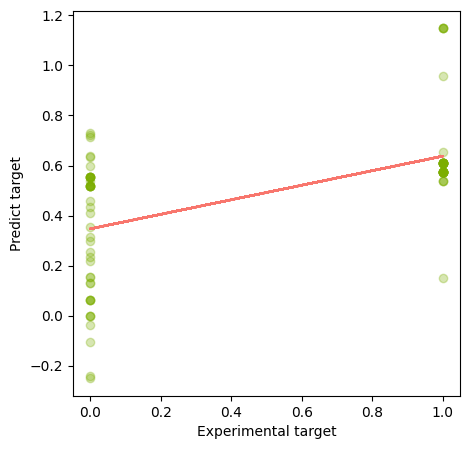

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict target')
plt.xlabel('Experimental target')

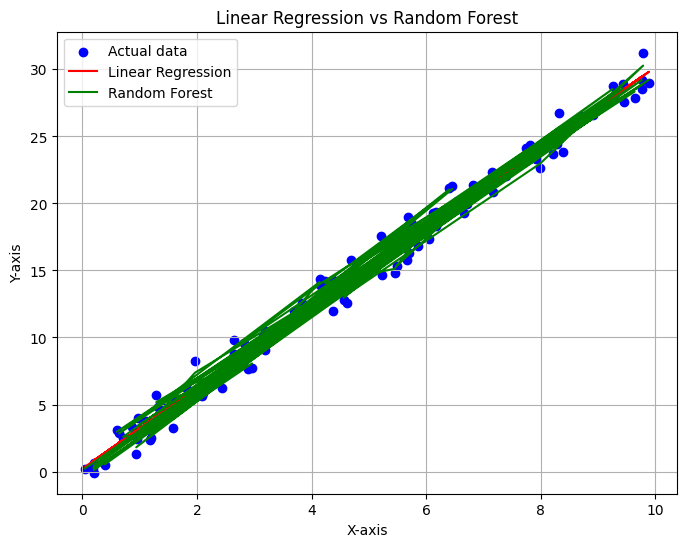

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Generate sample data (Replace this with your actual data)
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.normal(size=100)

# Fit Linear Regression and Random Forest models
linear_reg = LinearRegression()
linear_reg.fit(X, y)

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

# Create scatter plot for actual data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')

# Plot Linear Regression line
plt.plot(X, linear_reg.predict(X), color='red', label='Linear Regression')

# Plot Random Forest predictions
plt.plot(X, rf.predict(X), color='green', label='Random Forest')

plt.title('Linear Regression vs Random Forest')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


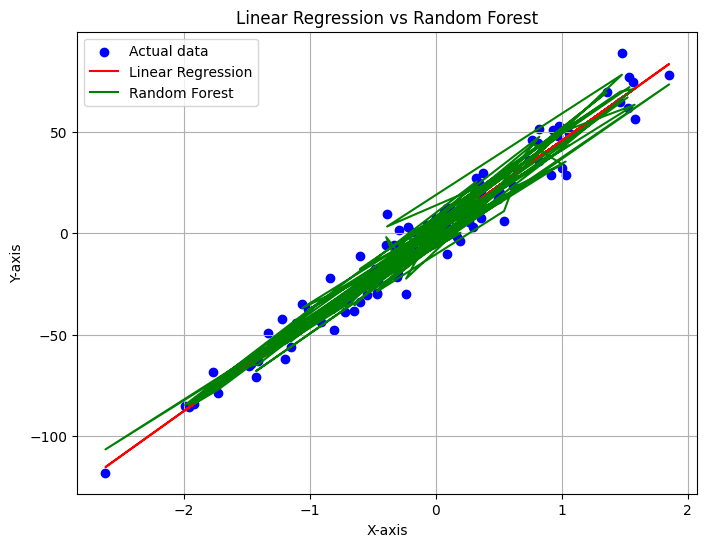

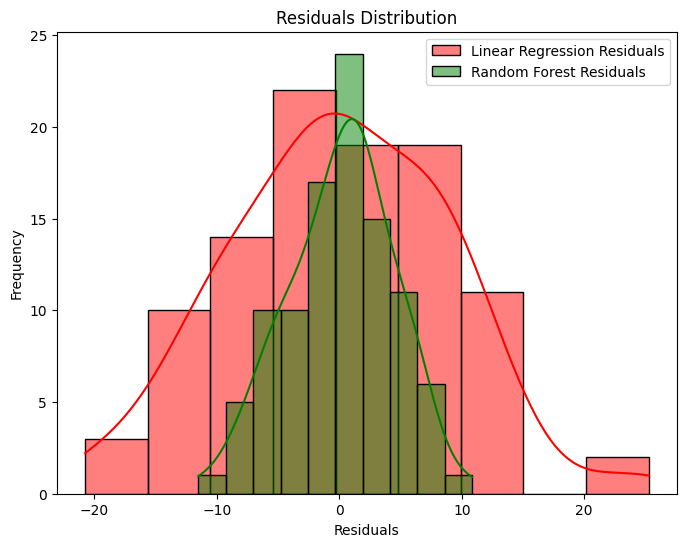

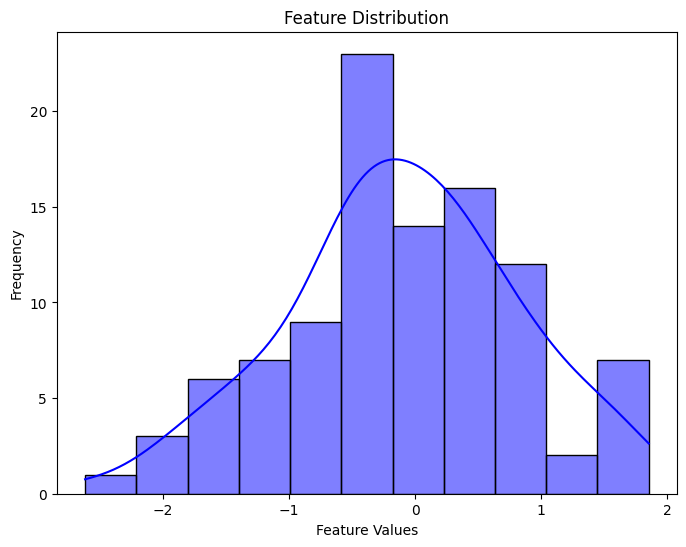

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate sample data (Replace this with your actual data)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit Linear Regression and Random Forest models
linear_reg = LinearRegression()
linear_reg.fit(X, y)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Scatter Plot for Linear Regression and Random Forest Predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, linear_reg.predict(X), color='red', label='Linear Regression')
plt.plot(X, rf.predict(X), color='green', label='Random Forest')
plt.title('Linear Regression vs Random Forest')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
linear_residuals = y - linear_reg.predict(X)
rf_residuals = y - rf.predict(X)
sns.histplot(linear_residuals, color='red', label='Linear Regression Residuals', kde=True)
sns.histplot(rf_residuals, color='green', label='Random Forest Residuals', kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Distribution Plots for Features
features = X[:, 0]  # Assuming a single feature for simplicity
plt.figure(figsize=(8, 6))
sns.histplot(features, color='blue', kde=True)
plt.title('Feature Distribution')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()
